## SPY index based on 8 others index

In [51]:
# from 14 Oct 2015 to 14 Oct 2020
# https://moneybadger.stocktwits.com/what-is-the-spy/

In [52]:
import numpy as np
import pandas as pd

In [53]:
spy = pd.read_csv('C:/Users/Jacob/spy_trackMLR.csv')
sp500 = pd.read_csv('C:/Users/Jacob/sp500_trackMLR.csv')
nas = pd.read_csv('C:/Users/Jacob/nas_trackMLR.csv')
dji = pd.read_csv('C:/Users/Jacob/dji_trackMLR.csv')
cac40 = pd.read_csv('C:/Users/Jacob/cac40_trackMLR.csv')
daxi = pd.read_csv('C:/Users/Jacob/daxi_trackMLR.csv')
aord = pd.read_csv('C:/Users/Jacob/aord_trackMLR.csv')
hsi = pd.read_csv('C:/Users/Jacob/hsi_trackMLR.csv')

In [54]:
spy=spy.set_index(['Date'])
sp500=sp500.set_index(['Date'])
nas=nas.set_index(['Date'])
dji=dji.set_index(['Date'])
cac40=cac40.set_index(['Date'])
daxi=daxi.set_index(['Date'])
aord=aord.set_index(['Date'])
hsi=hsi.set_index(['Date'])

In [55]:
panel=pd.DataFrame()
panel['spy']=spy['Open'].shift(-1)-spy['Open']
panel['spy_lag1']=panel['spy'].shift(1)
panel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
panel['nas']=nas['Open']-nas['Open'].shift(1)
panel['dji']=dji['Open']-dji['Open'].shift(1)
panel['cac40']=cac40['Open']-cac40['Open'].shift(1)
panel['daxi']=daxi['Open']-daxi['Open'].shift(1)
#time zone issue
panel['aord']=aord['Close']-aord['Open']
panel['hsi']=hsi['Close']-hsi['Open']
panel['Price']=spy['Open']

In [56]:
panel.head()

,spy,spy_lag1,sp500,nas,dji,cac40,daxi,aord,hsi,Price
Date,,,,,,,,,,
2015-10-14,-0.099991,NaN,NaN,NaN,NaN,NaN,NaN,-4.200196,41.089843,200.179993
2015-10-15,2.750000,-0.099991,-13.179932,0.060002,-134.220703,43.350098,0.6818,35.200196,220.750000,200.080002
2015-10-16,-0.330002,2.750000,51.920166,1.180000,196.890625,50.790039,-0.1818,38.100097,-66.220703,202.830002
2015-10-19,0.350006,-0.330002,13.750000,-0.230000,67.679688,-5.040039,-0.4546,0.899903,-10.000000,202.500000
2015-10-20,0.759995,0.350006,2.709961,0.619999,19.041015,10.669921,0.5000,-33.000000,-2.378906,202.850006


In [57]:
panel.shape

(1259, 10)

In [58]:
panel.isnull().sum(axis=0)

spy          1
spy_lag1     1
sp500        1
nas          1
dji          1
cac40       15
daxi        85
aord        24
hsi         58
Price        0
dtype: int64

In [59]:
panel = panel.dropna()
panel.shape

(1130, 10)

## Data Splitting 

In [60]:
#80% for training data, 20% for testing data, 904 for training, 226 for testing
#try 50%-50%, use 1000 data only

In [61]:
Train= panel.iloc[0:500, :]
Test = panel.iloc[500:1000, :]
print(Train.shape, Test.shape)

(500, 10) (500, 10)


In [62]:
import warnings
warnings.filterwarnings("ignore")

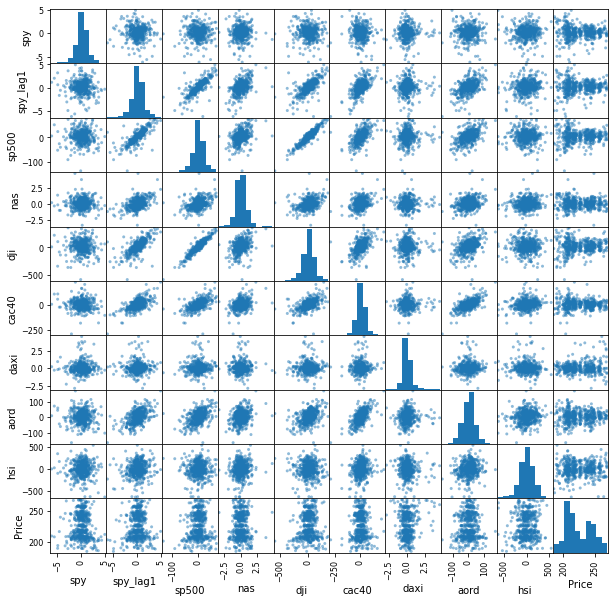

In [63]:
# pandas.tools.plotting is changed to pandas.plotting
from pandas.plotting import scatter_matrix
s_m = scatter_matrix(Train, figsize=(10, 10))

In [64]:
panel.corr()

,spy,spy_lag1,sp500,nas,dji,cac40,daxi,aord,hsi,Price
spy,1.000000,-0.047969,0.005539,-0.053485,-0.009327,-0.021382,0.094817,-0.012161,-0.113673,-0.020257
spy_lag1,-0.047969,1.000000,0.907201,0.681412,0.855817,0.636855,0.064850,0.574216,0.201665,0.045564
sp500,0.005539,0.907201,1.000000,0.622846,0.940952,0.630951,0.162094,0.471571,0.101758,0.048339
nas,-0.053485,0.681412,0.622846,1.000000,0.572609,0.383317,0.053354,0.366457,0.092174,0.023135
dji,-0.009327,0.855817,0.940952,0.572609,1.000000,0.648884,0.153699,0.487272,0.076318,0.034579
cac40,-0.021382,0.636855,0.630951,0.383317,0.648884,1.000000,0.108306,0.618910,0.205269,-0.010172
daxi,0.094817,0.064850,0.162094,0.053354,0.153699,0.108306,1.000000,0.024174,-0.089265,-0.011174
aord,-0.012161,0.574216,0.471571,0.366457,0.487272,0.618910,0.024174,1.000000,0.159116,0.014838
hsi,-0.113673,0.201665,0.101758,0.092174,0.076318,0.205269,-0.089265,0.159116,1.000000,-0.029456
Price,-0.020257,0.045564,0.048339,0.023135,0.034579,-0.010172,-0.011174,0.014838,-0.029456,1.000000


In [65]:
#adjusted R-squared is large
#coeff to compare which variable is the most important
#app is the most important, it has the largest absolute value
import statsmodels.formula.api as smf
formula = 'spy~spy_lag1+sp500+nas+dji+cac40+aord+daxi+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()
#app has higher coefficient, and it contributes the most to nas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9101
Date:                Wed, 14 Oct 2020   Prob (F-statistic):              0.508
Time:                        16:33:01   Log-Likelihood:                -854.75
No. Observations:                 500   AIC:                             1728.
Df Residuals:                     491   BIC:                             1765.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1389      0.061      2.275      0.023       0.019       0.259
spy_lag1      -0.0800      0.084     -0.956      0.340      -0.244       0.084
sp500          0.0104      0.008      1.245      0.214      -0.006       0.027
nas            0.0899      0.091      0.984      0.326      -0.090       0.270
dji           -0.0015      0.002     -0.922      0.357      -0.005       0.002
cac40         -0.0035      0.002     -1.851      0.065      -0.007       0.000
aord           0.0015      0.002      0.735      0.463      -0.003       0.006
daxi           0.0564      0.079      0.712      0.477      -0.099       0.212
hsi            0.0002      0.000      0.429      0.668      -0.001       0.001
==============================================================================
Omnibus:                       56.007   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.152
Skew:                          -0.512   Prob(JB):                     1.86e-37
Kurtosis:                       5.659   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

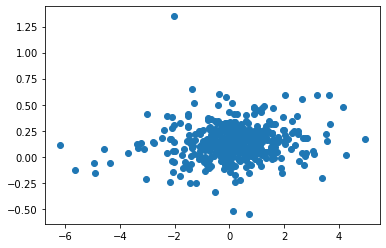

In [67]:
import matplotlib.pyplot as plt
plt.scatter(Train['spy'], Train['PredictedY'])

In [68]:
#The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift 
#in the independent variable while holding other variables in the model constant. 
#This property of holding the other variables constant is crucial because it allows you to assess
#the effect of each variablein isolation from the others.
#### may have binding variables ####

In [69]:
#The Durbin-Watson statistic will always have a value between 0 and 4. 
#A value of 2.0 means that there is no autocorrelation detected in the sample. 
#Values from 0 to less than 2 indicate positive autocorrelation
#Values from from 2 to 4 indicate negative autocorrelation.
#https://www.investopedia.com/terms/d/durbin-watson-statistic.asp#:~:text=The%20Durbin%2DWatson%20statistic%20will,to%204%20indicate%20negative%20autocorrelation.

In [70]:
#difference between R2 and adjusted R2
#https://discuss.analyticsvidhya.com/t/difference-between-r-square-and-adjusted-r-square/264/3

#The correlation coefficient provides a measure of linear association between X and Y with no adjustment for other variables.
#If you estimate a simple linear regression model (with X as the only explanatory variable and Y as the outcome variable), 
#the raw and standardized regression coefficients will have the same sign as the correlation between X and Y, 
#and the standardized regression coefficient (which is what many people mean when they talk about a Beta coefficient in regression)
#will be equivalent to the correlation.
#But as soon as you include one or more additional explanatory variables in the model, 
#there is no reason to expect the signs to remain the same. 

In [71]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [72]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [73]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 8, 'spy')

,Train,Test
R2,-0.001443,-0.004416
RMSE,1.349388,3.385471


In [74]:
### add this to remove the above error
import warnings
warnings.filterwarnings("ignore")

In [50]:
#result is not significant, Durbin-Watson test=2, no correlation detected in sample

# Profit of Signal-based strategy

In [75]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  114.6200489999996


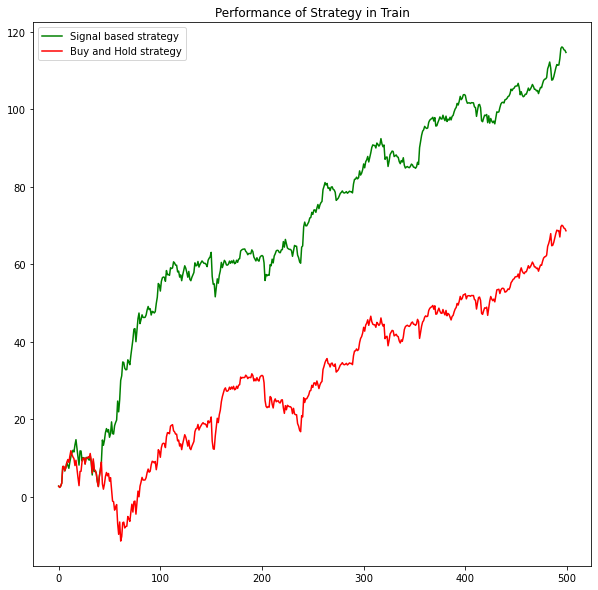

In [76]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [84]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  33.44966000000002


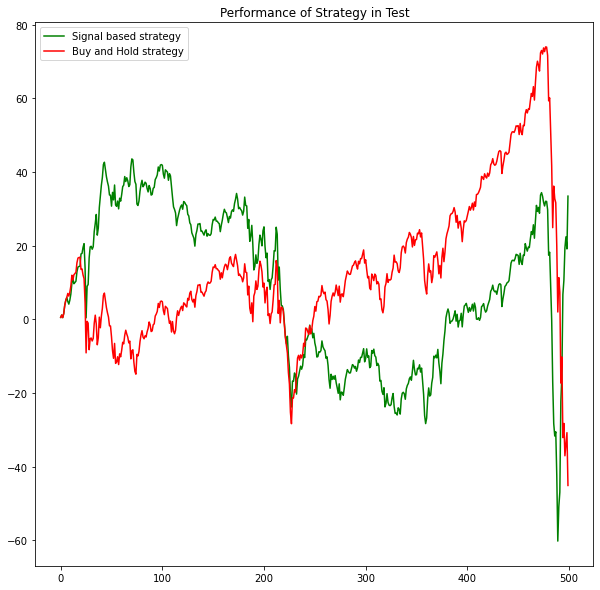

In [85]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# Evaluation of model - Practical Standard

In [86]:
#Sharpe Ratio, Maximum Drawdown

In [87]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [88]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.16353282923247525
Yearly Sharpe Ratio is  2.596003184063539


In [89]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.017922517907952427
Yearly Sharpe Ratio is  0.2845111515152624


In [90]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.05609602173693669


In [91]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.33382758628519077
